In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

n: 10 and sigma: 0.1
Коэффициенты модели: [5.01758964]
Свободный член: -1.0182966500385104
Предсказания:  [-1.47787227e-02  9.01688262e+00  1.24421444e+02]

n: 10 and sigma: 1
Коэффициенты модели: [5.09012106]
Свободный член: -1.5636499469522438
Предсказания:  [ -0.54562574   8.61659217 125.68937651]

n: 10 and sigma: 3
Коэффициенты модели: [8.14517076]
Свободный член: -1.1356315172548639
Предсказания:  [  0.49340263  15.15471    202.49363747]

n: 100 and sigma: 0.1
Коэффициенты модели: [5.04732887]
Свободный член: -1.030795014946879
Предсказания:  [-2.13292411e-02  9.06386272e+00  1.25152427e+02]

n: 100 and sigma: 1
Коэффициенты модели: [4.74994616]
Свободный член: -0.8247354105361113
Предсказания:  [  0.12525382   8.6751569  117.92391851]

n: 100 and sigma: 3
Коэффициенты модели: [2.91897809]
Свободный член: 0.3410795073073627
Предсказания:  [ 0.92487513  6.17903569 73.31553182]

n: 1000 and sigma: 0.1
Коэффициенты модели: [4.99846787]
Свободный член: -0.9948024971405478
Предсказани

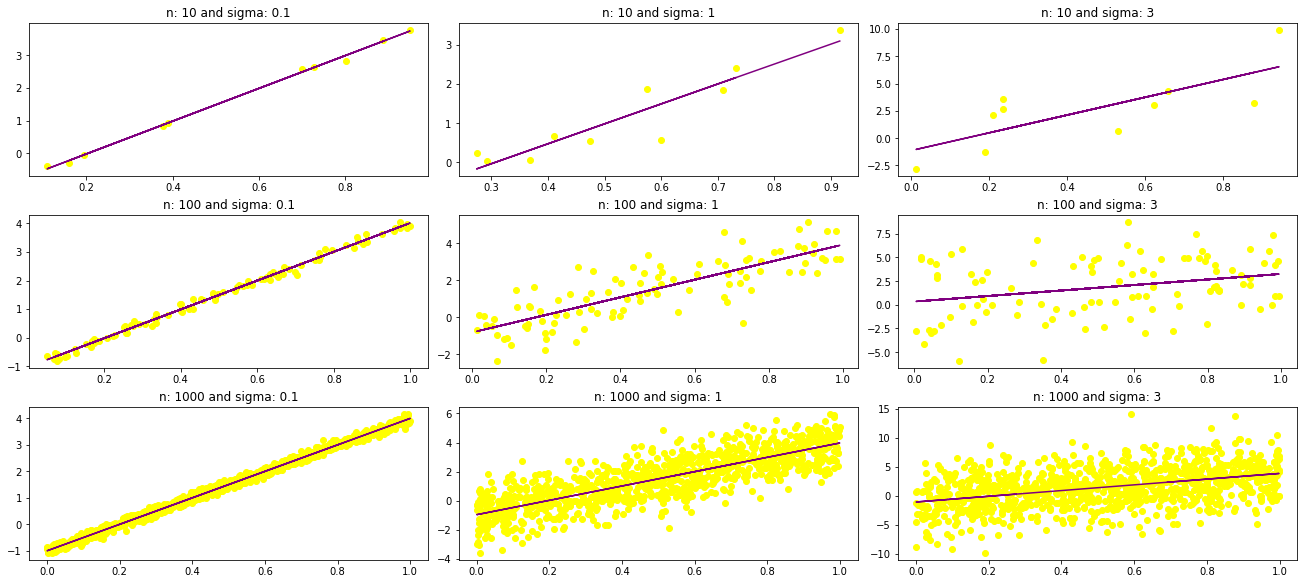

In [2]:
predict = np.array([0.2, 2, 25])

ns = [10, 100, 1000]
sigma = [0.1, 1, 3]

a = 5
b = -1

fig, ax = plt.subplots(len(ns), 3, figsize=(18, 8), constrained_layout=True)

for i, n in enumerate(ns):
    for j, sig in enumerate(sigma):
        eps = np.random.normal(0, sig, n)
        X = np.random.uniform(0, 1, n)

        Y = a*X + b + eps

        Liner = LinearRegression().fit(X.reshape(-1,1), Y)
        #print('sec:', Liner.score(X.reshape(-1,1), Y))
        print(f"n: {n} and sigma: {sig}")
        print('Коэффициенты модели:', Liner.coef_)
        
        print('Свободный член:', Liner.intercept_)

        print('Предсказания: ', Liner.coef_*predict + Liner.intercept_)
        
        print()
        
        ax[i, j].scatter(X, Y, color='yellow')
        linear_reg = X*Liner.coef_ + Liner.intercept_
        ax[i, j].plot(X, linear_reg, color='purple');
        ax[i, j].set_title(f"n: {n} and sigma: {sig}")

In [3]:
n = 100

sigma = 1

degrees = [0, 1, 3, 5, 6]
m = len(degrees)

X = np.random.uniform(0, 1, n)
X_sup = np.zeros((n, m))

for i, k in enumerate(degrees):
    X_sup[:, i] = X**k

eps = np.random.normal(0, sigma, n)

a = 5*np.ones(m).reshape(m, 1)

Y = np.matmul(X_sup, a).reshape(n)
    
Y += eps

Parameters
sec: 0.9558017460039039
Коэффициенты модели: [  0.          10.81930479 -23.64490218  74.79630895 -41.30944611]
Свободный член: 4.2941572560074475


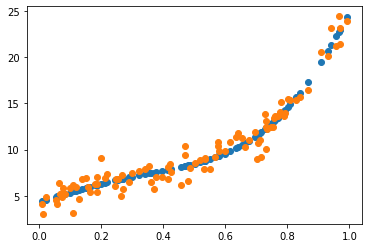

In [4]:
Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

plt.scatter(X, Y_new)
plt.scatter(X, Y)

<h1>NORM</h1>

In [5]:
max(abs(Y_new - Y))

2.786601778380658

In [6]:
(abs(Y_new - Y)**2).mean()

1.0364493011248164

In [7]:
xs = np.linspace(0, 1, 1000)

x_sup = np.zeros((1000, m))
for k in range(m):
    x_sup[:, k] = xs**k
    
a_p = np.array(Liner.coef_)
b_p = Liner.intercept_

Y_p = np.matmul(x_sup, a_p) + b_p

a = m*np.ones(m).reshape(m, 1)

Y = np.matmul(x_sup, a).reshape(1000)

max(abs(Y_p - Y))

2.388914936011865

In [8]:
df2 = pd.DataFrame(X_sup)
df2.corr()

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.910962,0.793679,0.743012
2,NaN,0.910962,1.000000,0.967162,0.939470
3,NaN,0.793679,0.967162,1.000000,0.995463
4,NaN,0.743012,0.939470,0.995463,1.000000


In [9]:
df2

,0,1,2,3,4
0,1.0,0.272178,0.020163,1.493711e-03,4.065554e-04
1,1.0,0.248756,0.015393,9.525130e-04,2.369437e-04
2,1.0,0.735640,0.398103,2.154398e-01,1.584861e-01
3,1.0,0.576528,0.191629,6.369453e-02,3.672168e-02
4,1.0,0.118301,0.001656,2.317080e-05,2.741127e-06
...,...,...,...,...,...
95,1.0,0.634846,0.255862,1.031199e-01,6.546527e-02
96,1.0,0.021551,0.000010,4.649222e-09,1.001974e-10
97,1.0,0.165751,0.004554,1.251059e-04,2.073640e-05
98,1.0,0.188225,0.006669,2.362570e-04,4.446943e-05


<h1>TASK 3</h1>

In [10]:
n = 100

sigma = 3

degrees = [0, 1, 2, 3, 4]
m = len(degrees)

X = np.random.uniform(0, 1, n)
X_sup = np.zeros((n, m))

for i, k in enumerate(degrees):
    X_sup[:, i] = X**k

eps = np.random.normal(0, sigma, n)

a = 5*np.ones(m).reshape(m, 1)

Y = np.matmul(X_sup, a).reshape(n)
    
Y += eps

Parameters
sec: 0.7491778661254318
Коэффициенты модели: [ 0.          0.         15.32012763  0.          0.        ]
Свободный член: 6.399002385767161
Parameters
sec: 0.773240752377222
Коэффициенты модели: [  0.          12.99532014 -15.99410476  29.55046401  -6.46129913]
Свободный член: 4.133230888195233


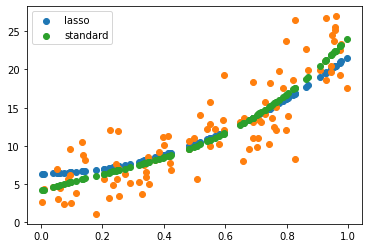

In [11]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.3)

Liner = clf.fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

plt.scatter(X, Y_new, label='lasso')
plt.scatter(X, Y)

Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

plt.scatter(X, Y_new, label='standard')
plt.legend()

Parameters
sec: 0.7720547365122479
Коэффициенты модели: [0.         5.55607858 5.08096982 4.43644793 3.91266601]
Свободный член: 5.048541733505337
Parameters
sec: 0.773240752377222
Коэффициенты модели: [  0.          12.99532014 -15.99410476  29.55046401  -6.46129913]
Свободный член: 4.133230888195233
Square Norm: 9.760302363109194


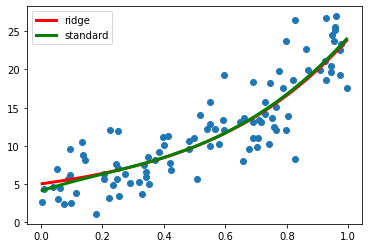

In [12]:
from sklearn import linear_model

clf = linear_model.Ridge(alpha=1)

Liner = clf.fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new0 = np.matmul(X_sup, a) + b

plt.plot(sorted(X), sorted(Y_new0), label='ridge', color='red', linewidth=3)
plt.scatter(X, Y)

Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)\

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

print('Square Norm:', ((Y-Y_new0)**2).mean())

plt.plot(sorted(X), sorted(Y_new), label='standard', color='green', linewidth=3)
plt.legend()

Parameters
sec: 0.6693841643758205
Коэффициенты модели: [0.         3.08789689 3.36479529 3.13055193 2.82235334]
Свободный член: 7.6174236801328385
Parameters
sec: 0.773240752377222
Коэффициенты модели: [  0.          12.99532014 -15.99410476  29.55046401  -6.46129913]
Свободный член: 4.133230888195233
Square Norm: 14.156514912174902


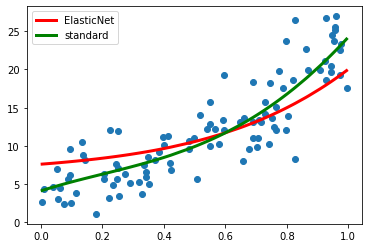

In [13]:
from sklearn import linear_model

clf = linear_model.ElasticNet(alpha=0.3)

Liner = clf.fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new0= np.matmul(X_sup, a) + b

plt.plot(sorted(X), sorted(Y_new0), label='ElasticNet', color='red', linewidth=3)
plt.scatter(X, Y)

Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

print('Square Norm:', ((Y-Y_new0)**2).mean())

plt.plot(sorted(X), sorted(Y_new), label='standard', color='green', linewidth=3)
plt.legend()

Parameters
sec: 0.7653442499830695
Коэффициенты модели: [ 0.          0.         16.85839941  0.          0.        ]
Свободный член: 5.831841396229412
Parameters
sec: 0.773240752377222
Коэффициенты модели: [  0.          12.99532014 -15.99410476  29.55046401  -6.46129913]
Свободный член: 4.133230888195233
Square Norm: 10.047636157750079


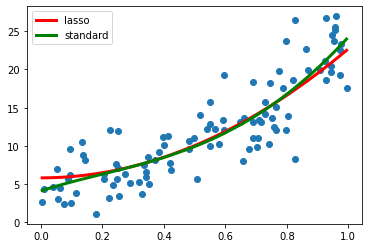

In [15]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.15)

Liner = clf.fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new0 = np.matmul(X_sup, a) + b

plt.plot(sorted(X), sorted(Y_new0), label='lasso', color='red', linewidth=3)
plt.scatter(X, Y)

Liner = LinearRegression().fit(X_sup, Y)

print('Parameters')
print('sec:', Liner.score(X_sup, Y))
print('Коэффициенты модели:', Liner.coef_)
print('Свободный член:', Liner.intercept_)

a = np.array(Liner.coef_)
b = Liner.intercept_

Y_new = np.matmul(X_sup, a) + b

print('Square Norm:', ((Y-Y_new0)**2).mean())

plt.plot(sorted(X), sorted(Y_new), label='standard', color='green', linewidth=3)
plt.legend()